In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
import seaborn as sns


In [6]:
import matplotlib.pyplot as plt

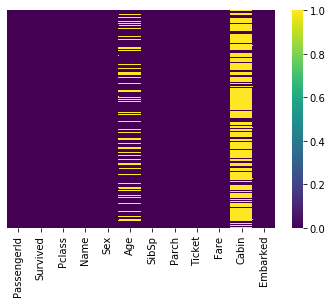

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

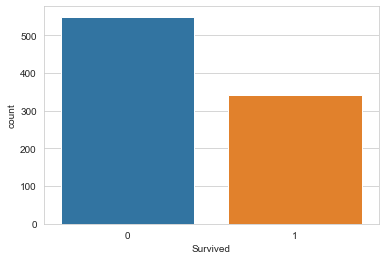

In [9]:
sns.countplot(x='Survived',data=df)

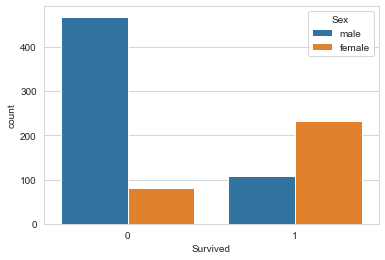

In [10]:
sns.countplot(x='Survived',hue='Sex',data=df)

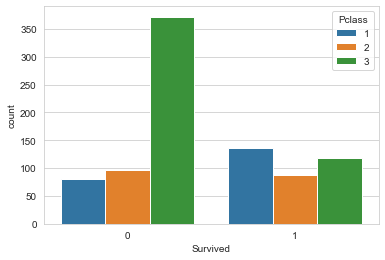

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df)

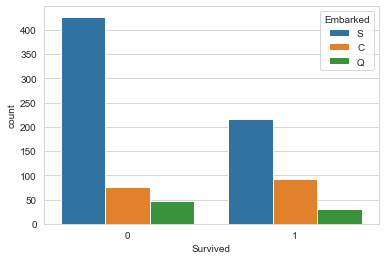

In [12]:
sns.countplot(x='Survived',hue='Embarked',data=df)

In [13]:
import matplotlib.pyplot as plt

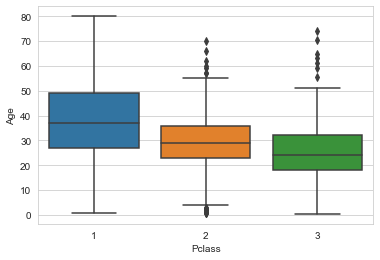

In [14]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [15]:
def impute(cols):
    Age= cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
df['Age']=df[['Age','Pclass',]].apply(impute,axis=1)

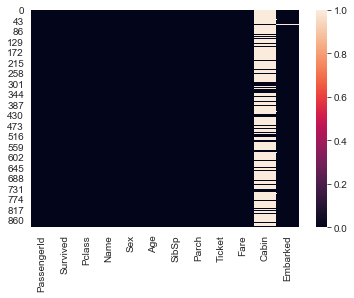

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


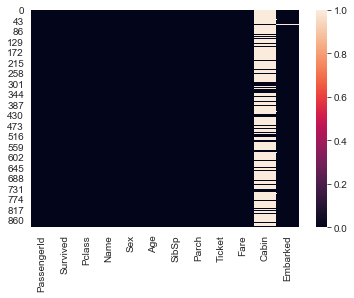

In [19]:
sns.heatmap(df.isnull())

In [20]:
df=df.drop(['Cabin'],axis=1)

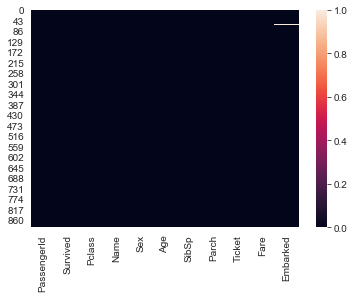

In [21]:
sns.heatmap(df.isnull())

In [22]:
df=df.drop(['PassengerId','Ticket'],axis=1)

In [23]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
Sexn=pd.get_dummies(df['Sex'],drop_first=True)

In [27]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [28]:
Sexn.head()

,male
0,1
1,0
2,0
3,0
4,1


In [29]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
dff=pd.concat([df,Sexn,embarked],axis=1)

In [31]:
dff.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,1


In [32]:
dff.drop(['Name','Sex','Embarked'],axis=1,inplace=True)

In [33]:
inputs=dff.drop(['Survived'],axis=1)

In [34]:
inputs.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [35]:
target=dff['Survived']

In [36]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn import tree

In [38]:
model=tree.DecisionTreeClassifier()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(inputs,target,test_size=0.1,random_state=19)

In [41]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
model.score(xtrain,ytrain)

0.9850187265917603

In [43]:
model.predict([[3,22,1,0,7.25,1,0,1]])

array([0], dtype=int64)

In [44]:
ytest.head()

624    0
524    0
73     0
828    1
398    0
Name: Survived, dtype: int64

In [45]:
ytest.head()

624    0
524    0
73     0
828    1
398    0
Name: Survived, dtype: int64

In [46]:
xtest.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
624,3,21.0,0,0,16.1000,1,0,1
524,3,24.0,0,0,7.2292,1,0,0
73,3,26.0,1,0,14.4542,1,0,0
828,3,24.0,0,0,7.7500,1,1,0
398,2,23.0,0,0,10.5000,1,0,1


In [47]:
model.predict([[3,22,0,0,9.23,1,0,1]])

array([0], dtype=int64)

In [48]:
model.score(xtest,ytest)

0.8111111111111111

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log=LogisticRegression()

In [51]:
log.fit(xtrain,ytrain)

C:\Users\bibek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
log.score(xtest,ytest)

0.8555555555555555

In [53]:
predict=log.predict(xtest)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
accuracy=confusion_matrix(ytest,predict)
accuracy

array([[56,  3],
       [10, 21]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy=accuracy_score(ytest,predict)

In [59]:
accuracy

0.8555555555555555